In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from mlxtend.classifier import StackingClassifier


In [22]:
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier = lr)
sclf2 = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier = clf3)

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data[:,1:3], iris.target

import warnings
warnings.simplefilter('ignore')

In [24]:
for clf, label in zip([clf1,clf2,clf3,sclf,sclf2], ['KNN','Gaussian Naive Bayes','Random Forest','stakcing Classifier1','stakcing Classifier2' ]):
                      scores = model_selection.cross_val_score(clf,X,y,cv=4, scoring = 'accuracy')
                      print(np.round(scores.mean(),3),np.round(scores.std(),3),label)

0.879 0.047 KNN
0.914 0.019 Gaussian Naive Bayes
0.947 0.027 Random Forest
0.927 0.035 stakcing Classifier1
0.94 0.031 stakcing Classifier2


In [27]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

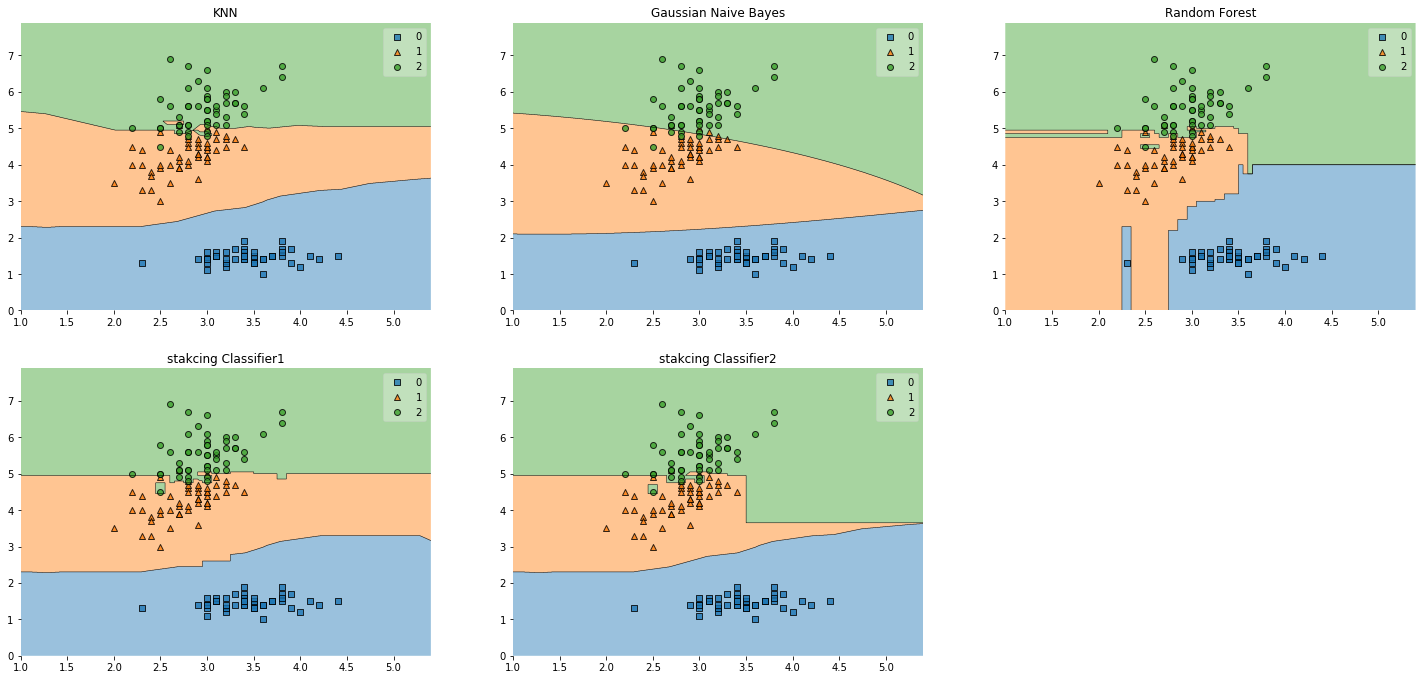

In [48]:
import itertools
fig = plt.figure(figsize = (25,18))
gs = gridspec.GridSpec(3,3)

for clf, label,grd in zip([clf1,clf2,clf3,sclf,sclf2], ['KNN','Gaussian Naive Bayes','Random Forest','stakcing Classifier1','stakcing Classifier2' ],itertools.product([0,1,2],repeat=2)):
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0],grd[1]])    
    plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

In [42]:
print(i,j)

3 0


In [51]:
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier = lr, use_probas = True, average_probas=True)
sclf2 = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier = clf3, use_probas = True, average_probas=True)
for clf, label in zip([clf1,clf2,clf3,sclf,sclf2], ['KNN','Gaussian Naive Bayes','Random Forest','stakcing Classifier1','stakcing Classifier2' ]):
                      scores = model_selection.cross_val_score(clf,X,y,cv=4, scoring = 'accuracy')
                      print(np.round(scores.mean(),3),np.round(scores.std(),3),label)

0.879 0.047 KNN
0.914 0.019 Gaussian Naive Bayes
0.953 0.023 Random Forest
0.947 0.02 stakcing Classifier1
0.934 0.029 stakcing Classifier2


In [52]:
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier = lr, use_probas = True, average_probas=False)
sclf2 = StackingClassifier(classifiers=[clf1,clf2,clf3], meta_classifier = clf3, use_probas = True, average_probas=False)
for clf, label in zip([clf1,clf2,clf3,sclf,sclf2], ['KNN','Gaussian Naive Bayes','Random Forest','stakcing Classifier1','stakcing Classifier2' ]):
                      scores = model_selection.cross_val_score(clf,X,y,cv=4, scoring = 'accuracy')
                      print(np.round(scores.mean(),3),np.round(scores.std(),3),label)

0.879 0.047 KNN
0.914 0.019 Gaussian Naive Bayes
0.92 0.02 Random Forest
0.947 0.02 stakcing Classifier1
0.94 0.022 stakcing Classifier2
